In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing dataset

data = pd.read_csv("D:\MY_ML\income.csv")
data.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
# extracting information from dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
Name      22 non-null object
Age       22 non-null int64
Income    22 non-null int64
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [4]:
# Describing the dataset

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,22.0,34.818182,5.901060,26.0,29.0,36.5,39.75,43.0
Income,22.0,90431.818182,43505.964412,45000.0,58500.0,67500.0,135250.00,162000.0


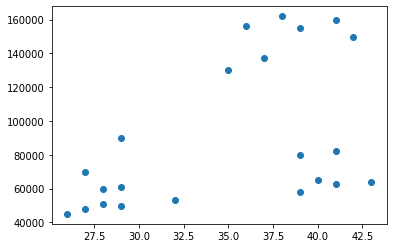

In [5]:
# Feature Engineering

# Plotting scatter plot 

plt.scatter(data['Age'],data['Income'])

In [6]:
# As we plot the scatter plot we can easily see 3 clusters. 

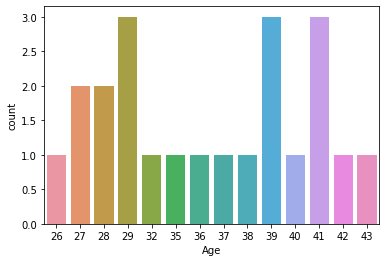

In [7]:
sns.countplot(x="Age",data=data)

In [8]:
#Creating a model

from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)    #Number of Clustering is 3
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
# Run K-Means Algo on Age and Income, Computed cluster as per our criteria where we told algo to identify 3 clusters

#cluster 1 = 0
#cluster 2 = 1
#cluster 3 = 2

y_pred = km.fit_predict(data[['Age','Income']])
y_pred

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [10]:
# Append a new column

data['Cluster'] = y_pred
data.head()

,Name,Age,Income,Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income')

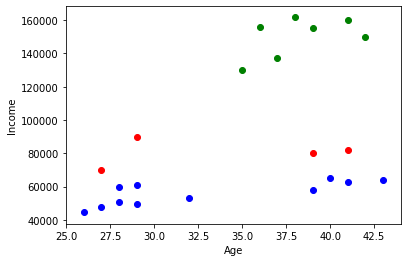

In [11]:
# Seperating those 3 clusters into different dataframe

df1 = data[data.Cluster == 0]
df2 = data[data.Cluster == 1]
df3 = data[data.Cluster == 2]

plt.scatter(df1.Age,df1['Income'],color='red')
plt.scatter(df2.Age,df2['Income'],color='green')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income')

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])

scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

data.head()

,Name,Age,Income,Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Age','Income']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [14]:
data['cluster'] = y_predicted
data.drop('Cluster',axis=1,inplace=True)
data.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [15]:
km.cluster_centers_ #Centroids       it has x and y coordinate

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

No handles with labels found to put in legend.


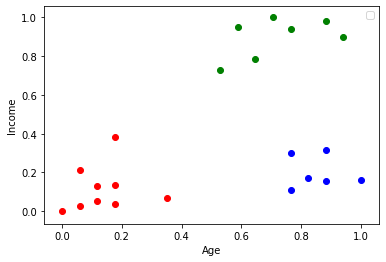

In [16]:
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]

plt.scatter(df1.Age,df1['Income'],color='red')
plt.scatter(df2.Age,df2['Income'],color='green')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

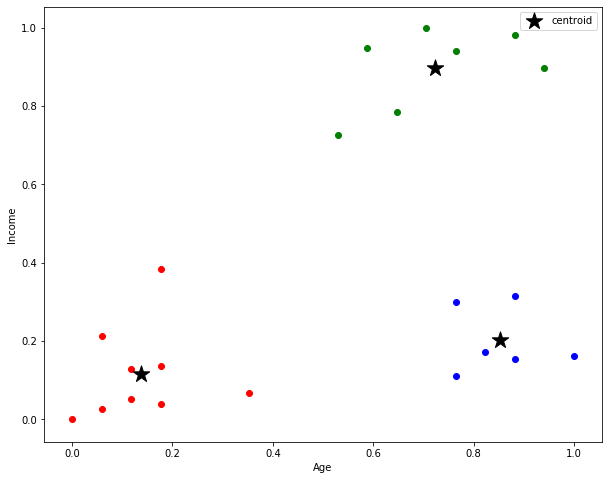

In [17]:
df1 = data[data.cluster == 0]
df2 = data[data.cluster == 1]
df3 = data[data.cluster == 2]

plt.figure(figsize=(10,8))

plt.scatter(df1.Age,df1['Income'],color='red')
plt.scatter(df2.Age,df2['Income'],color='green')
plt.scatter(df3.Age,df3['Income'],color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="*",label="centroid",s=300)

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [18]:
# Elbow plot

k_range = range(1,10)        # define K-range

SSE = []
for k in k_range:
    km = KMeans(n_clusters=k) # Each iteration we will create new model with cluster = K 
    km.fit(data[['Age','Income']]) # We are trying to fit both of our important features
    SSE.append(km.inertia_) # In KMeans there is a parameter called inertia that will give us the SSE & we append that error to our array

In [19]:
SSE

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22020960864009398,
 0.17310821424993492,
 0.13265419827245162,
 0.10188787724979426]

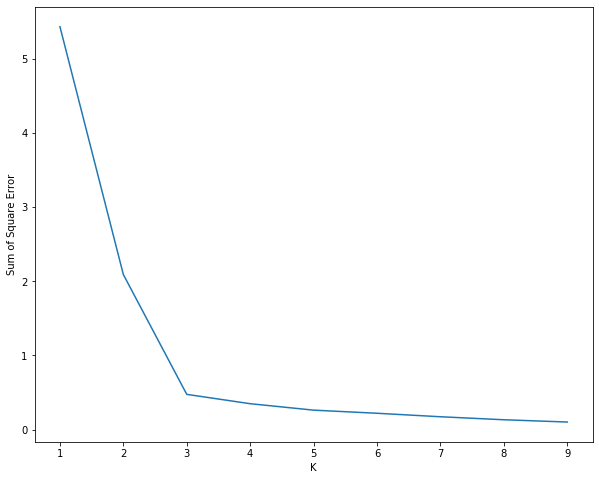

In [20]:
plt.figure(figsize=(10,8))
plt.xlabel('K')
plt.ylabel('Sum of Square Error')
plt.plot(k_range,SSE)